# Credit Risk/Loan Default prediction

Financial institutions must assess the risk associated with lending money to individuals. Incorrect credit decisions can lead to significant financial losses or missed business opportunities.

In this project, we build an end-to-end machine learning system to assess credit risk by predicting whether a borrower is likely to fully repay a loan or not, based on historical loan and borrower information.

The task is formulated as a binary classification problem, with an additional focus on estimating the probability of non-repayment to support risk-aware decision making.

## Reading The Data
-----------------

In [2]:
import pandas as pd
data = pd.read_csv('../data/raw/loan_data.csv')

## Exploring The Data
-----------------

#### Overview

In [3]:
#info
data.info()
print('\n========================================================================================')

# Duplicated Records
print('Duplicated Rows: ')
print(data.duplicated().sum())
print('\n========================================================================================')

# Null Values
print('Null Values: ')
print(data.isna().sum())
print('\n========================================================================================')

# Check for inconsistencies
for column in data.select_dtypes(include='object'):
    print(f"\nColumn: {column}")
    print(data[column].unique())
    print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB

Duplicated Rows: 
0

Null Values: 
credit.policy        0
purp

##### DATA SAMPLES

In [6]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
data.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


#### Outlier Detection

In [13]:
# Summary statistics
numeric_cols = [
    'int.rate',
    'installment',
    'log.annual.inc',
    'dti',
    'fico',
    'days.with.cr.line',
    'revol.bal',
    'revol.util'
]
data[numeric_cols].describe()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000
25%,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000
50%,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000
75%,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000


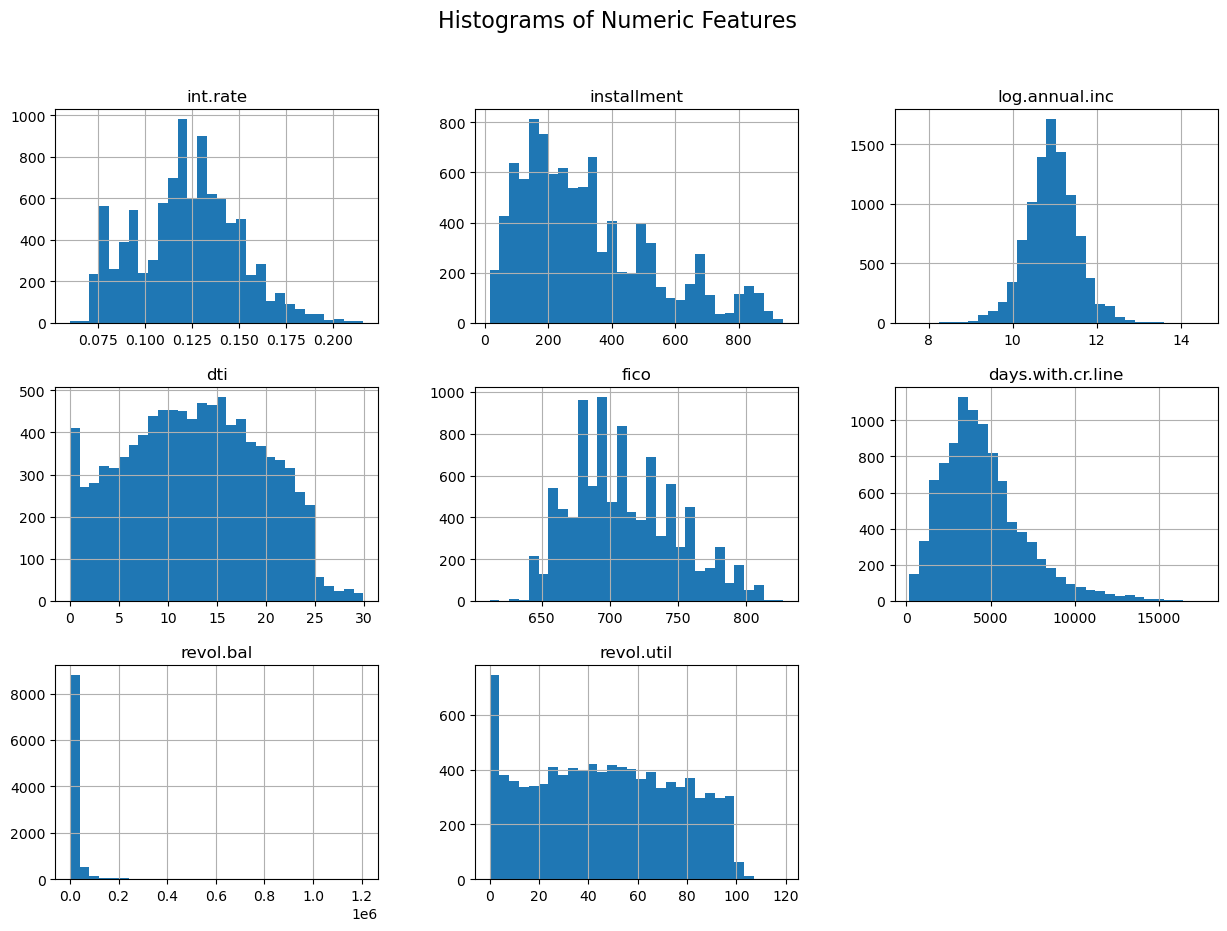

In [14]:
import matplotlib.pyplot as plt

data[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

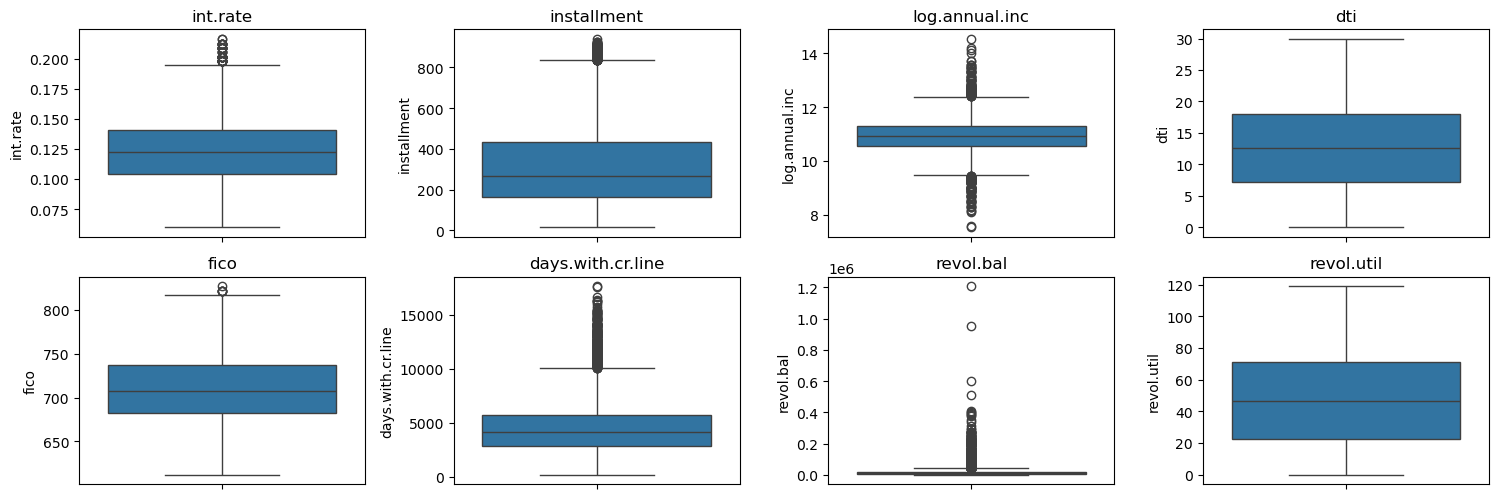

In [15]:
import seaborn as sns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
# IQR method
outlier_info = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    outlier_info[col] = outliers.shape[0]

print("Number of potential outliers per column:")
for col, count in outlier_info.items():
    print(f"{col}: {count}")

Number of potential outliers per column:
int.rate: 51
installment: 236
log.annual.inc: 238
dti: 0
fico: 6
days.with.cr.line: 346
revol.bal: 780
revol.util: 0


In [17]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data[numeric_cols]))
outlier_rows = (z_scores > 3).any(axis=1)  # Rows with any z-score > 3
print(f"Number of rows with extreme outliers (z>3): {outlier_rows.sum()}")

Number of rows with extreme outliers (z>3): 387


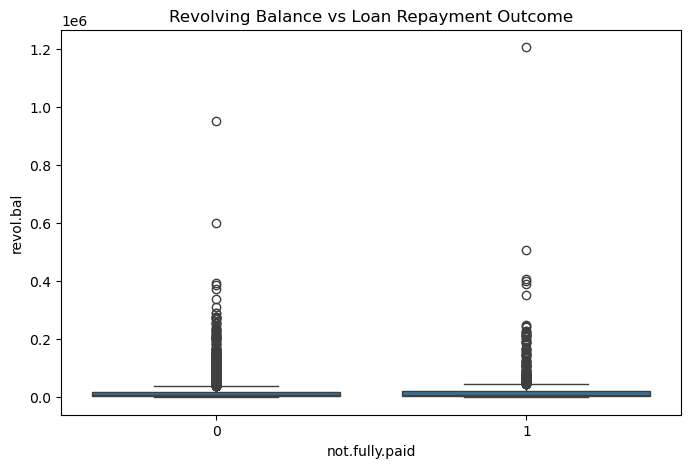

In [18]:
# Example: revol.bal vs target
plt.figure(figsize=(8,5))
sns.boxplot(x='not.fully.paid', y='revol.bal', data=data)
plt.title('Revolving Balance vs Loan Repayment Outcome')
plt.show()

## EDA

In [19]:
# Target distribution
data['not.fully.paid'].value_counts(normalize=True)

not.fully.paid
0    0.839946
1    0.160054
Name: proportion, dtype: float64

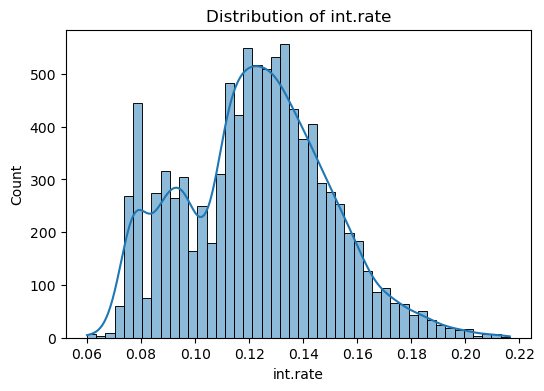

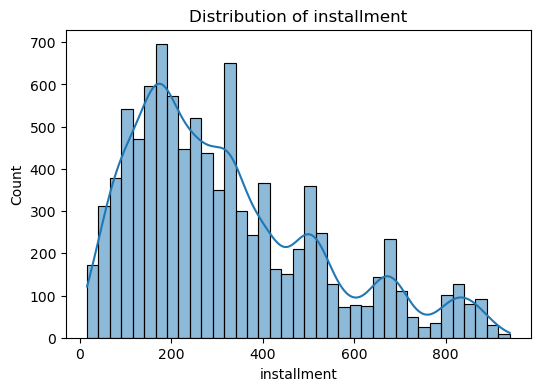

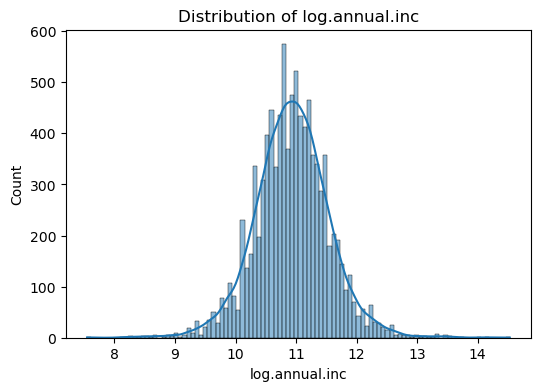

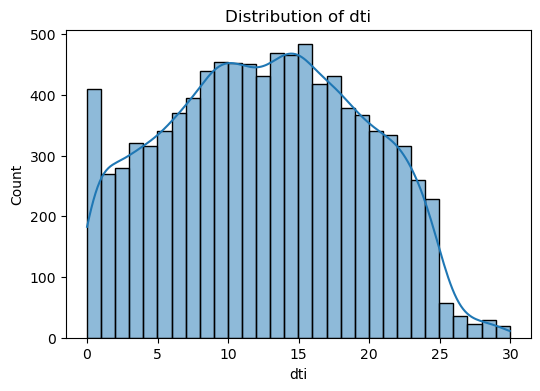

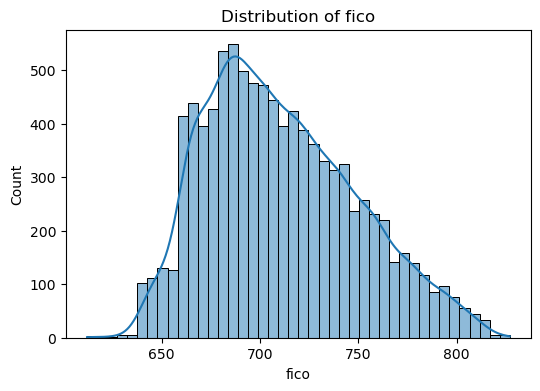

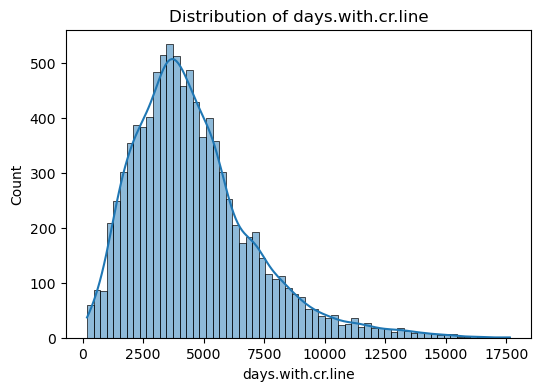

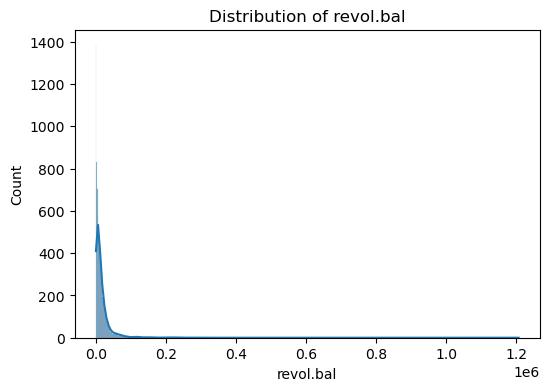

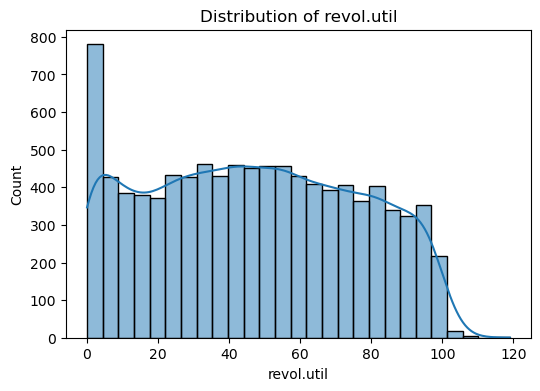

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


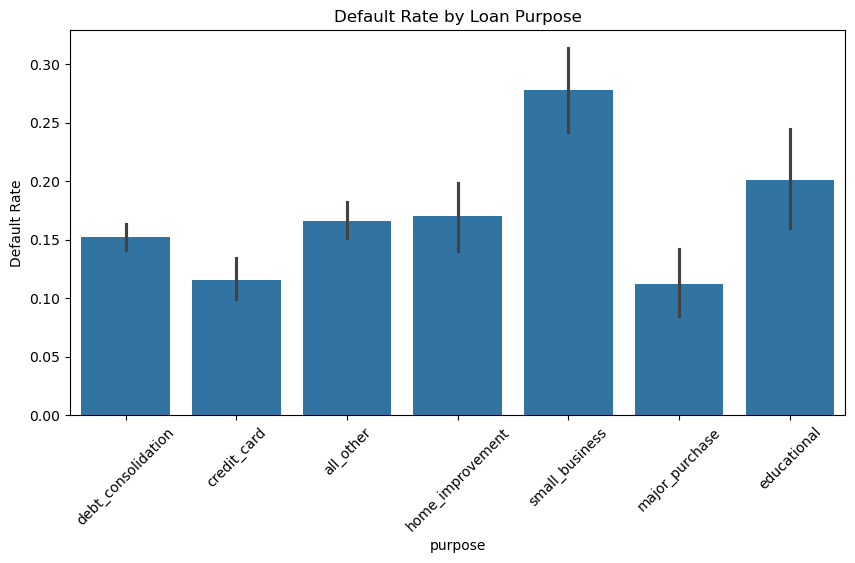

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=data,
    x='purpose',
    y='not.fully.paid',
    estimator=lambda x: sum(x) / len(x)
)
plt.xticks(rotation=45)
plt.title('Default Rate by Loan Purpose')
plt.ylabel('Default Rate')
plt.show()

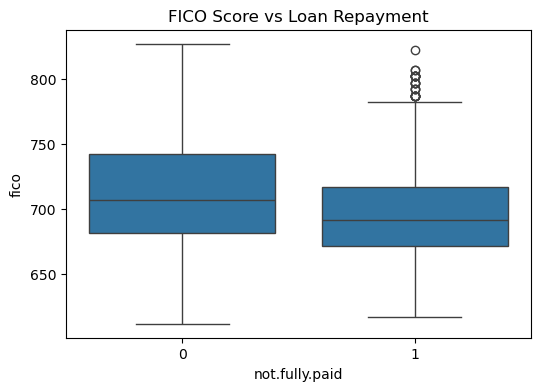

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=data,
    x='not.fully.paid',
    y='fico'
)
plt.title('FICO Score vs Loan Repayment')
plt.show()

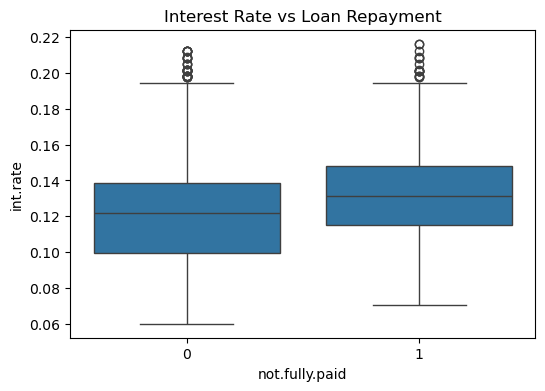

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=data,
    x='not.fully.paid',
    y='int.rate'
)
plt.title('Interest Rate vs Loan Repayment')
plt.show()


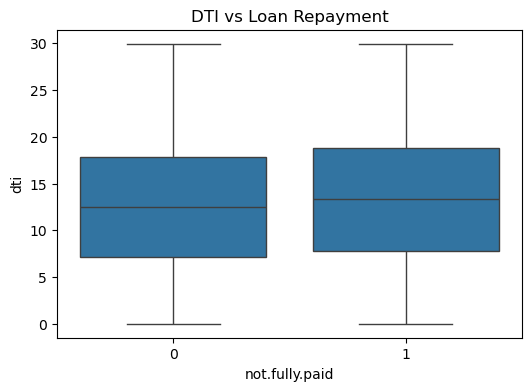

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=data,
    x='not.fully.paid',
    y='dti'
)
plt.title('DTI vs Loan Repayment')
plt.show()

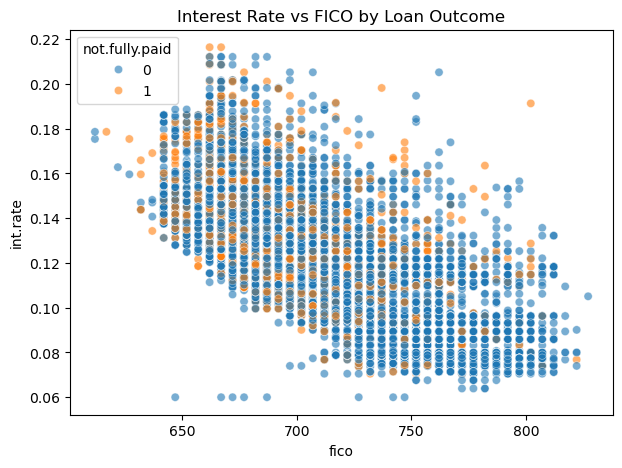

In [26]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=data,
    x='fico',
    y='int.rate',
    hue='not.fully.paid',
    alpha=0.6
)
plt.title('Interest Rate vs FICO by Loan Outcome')
plt.show()


#### Dealing with outliers

In [27]:
import numpy as np
# 1. installment
# Right-skewed financial variable → log transform
data['installment'] = np.log1p(data['installment'])

# 2. revol.bal
data['revol.bal'] = np.log1p(data['revol.bal'])

# 3. days.with.cr.line
data['days.with.cr.line'] = data['days.with.cr.line'] / 365
data['days.with.cr.line'] = np.log1p(data['days.with.cr.line'])

#### Correlation Analysis

In [29]:
corr_features = [
    'int.rate', 'installment', 'log.annual.inc', 'dti',
    'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
    'inq.last.6mths', 'delinq.2yrs', 'pub.rec'
]

corr_matrix = data[corr_features].corr()

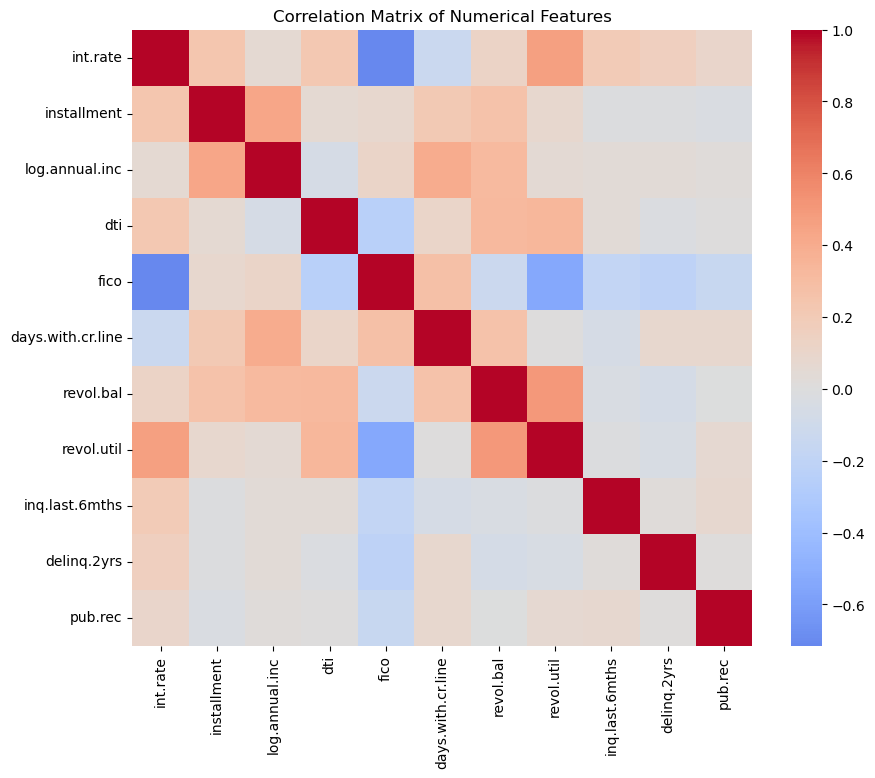

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    center=0
)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [32]:
high_corr_threshold = 0.7

high_corr_pairs = (
    corr_matrix.abs()
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

high_corr_pairs[high_corr_pairs > high_corr_threshold]

int.rate  fico    0.714821
dtype: float64

In [33]:
target_corr = (
    data[corr_features]
    .corrwith(data['not.fully.paid'])
    .sort_values()
)

target_corr

fico                -0.149666
days.with.cr.line   -0.035757
log.annual.inc      -0.033439
revol.bal            0.007747
delinq.2yrs          0.008881
dti                  0.037362
installment          0.037906
pub.rec              0.048634
revol.util           0.082088
inq.last.6mths       0.149452
int.rate             0.159552
dtype: float64

## Saving the processed data

In [34]:
data.to_csv("../data/processed/loan_data_processed.csv", index=False)